In [2]:
#La funcion de este programa es un algoritmo de estrategias de comercio
#el programa usa el movimiento doble crossover promedio para determinar cuando para comprar y vender stock

In [28]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [29]:
Apple = pd.read_csv("AAPL.csv")
Apple

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,30.490000,30.642857,30.340000,30.572857,26.538483,123432400
1,2010-01-05,30.657143,30.798571,30.464285,30.625713,26.584366,150476200
2,2010-01-06,30.625713,30.747143,30.107143,30.138571,26.161509,138040000
3,2010-01-07,30.250000,30.285715,29.864286,30.082857,26.113146,119282800
4,2010-01-08,30.042856,30.285715,29.865715,30.282858,26.286753,111902700
...,...,...,...,...,...,...,...
2597,2020-04-29,284.730011,289.670013,283.890015,287.730011,287.730011,34320200
2598,2020-04-30,289.959991,294.529999,288.350006,293.799988,293.799988,45766000
2599,2020-05-01,286.250000,299.000000,285.850006,289.070007,289.070007,60154200
2600,2020-05-04,289.170013,293.690002,286.320007,293.160004,293.160004,33392000


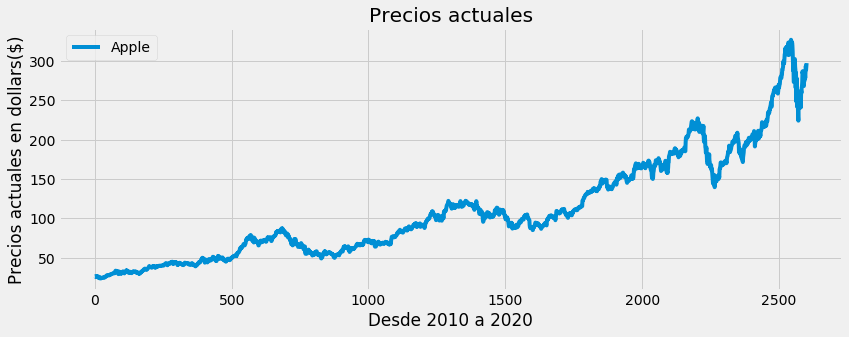

In [30]:
#visualiar datos
plt.figure(figsize=(12.5, 4.5))
plt.plot(Apple['Adj Close'], label = 'Apple')
plt.title('Precios actuales')
plt.xlabel('Desde 2010 a 2020')
plt.ylabel('Precios actuales en dollars($)')
plt.legend(loc='upper left')
plt.show()

In [31]:
#Crear promedio movil de 30 dias 
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = Apple['Adj Close'].rolling(window= 30).mean()
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2597,262.634999
2598,264.205999
2599,265.682332
2600,267.812999


In [32]:
#crear promedio movil de 100 dias
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = Apple['Adj Close'].rolling(window= 100).mean()
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2597,286.557344
2598,286.845832
2599,287.035842
2600,287.304562


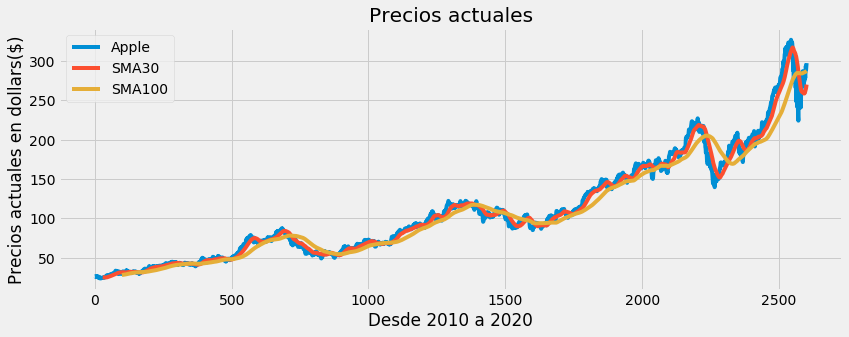

In [33]:
#visualizar datos
plt.figure(figsize=(12.5, 4.5))
plt.plot(Apple['Adj Close'], label = 'Apple')
plt.plot(SMA30['Adj Close'], label='SMA30')
plt.plot(SMA100['Adj Close'], label='SMA100')
plt.title('Precios actuales')
plt.xlabel('Desde 2010 a 2020')
plt.ylabel('Precios actuales en dollars($)')
plt.legend(loc='upper left')
plt.show()

In [34]:
#crear un nuevo data frame para almacenar todos los datos
data = pd.DataFrame()
data['Apple'] = Apple['Adj Close']
data['SMA30'] = SMA30['Adj Close']
data['SMA100'] = SMA100['Adj Close']
data

,Apple,SMA30,SMA100
0,26.538483,NaN,NaN
1,26.584366,NaN,NaN
2,26.161509,NaN,NaN
3,26.113146,NaN,NaN
4,26.286753,NaN,NaN
...,...,...,...
2597,287.730011,262.634999,286.557344
2598,293.799988,264.205999,286.845832
2599,289.070007,265.682332,287.035842
2600,293.160004,267.812999,287.304562


In [35]:
#crear una funcion para señal cuando vas a comprar y vender el stock/asset
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell= []
    flag = -1
    
    for i in range(len(data)):
        if data['SMA30'][i] > data['SMA100'][i]:
            if flag != 1:
                sigPriceBuy.append(data['Apple'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA30'][i] < data['SMA100'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['Apple'][i])
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
                
    return (sigPriceBuy, sigPriceSell)            
                
    
    

In [36]:
#almacenar los datos de compra y venta en una variable
buy_sell = buy_sell(data)
data['Buy_signal_Price'] = buy_sell[0]
data['Sell_signal_Price'] = buy_sell[1]

In [37]:
#mostrar los datos
data

,Apple,SMA30,SMA100,Buy_signal_Price,Sell_signal_Price
0,26.538483,NaN,NaN,NaN,NaN
1,26.584366,NaN,NaN,NaN,NaN
2,26.161509,NaN,NaN,NaN,NaN
3,26.113146,NaN,NaN,NaN,NaN
4,26.286753,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2597,287.730011,262.634999,286.557344,NaN,287.730011
2598,293.799988,264.205999,286.845832,NaN,293.799988
2599,289.070007,265.682332,287.035842,NaN,289.070007
2600,293.160004,267.812999,287.304562,NaN,293.160004


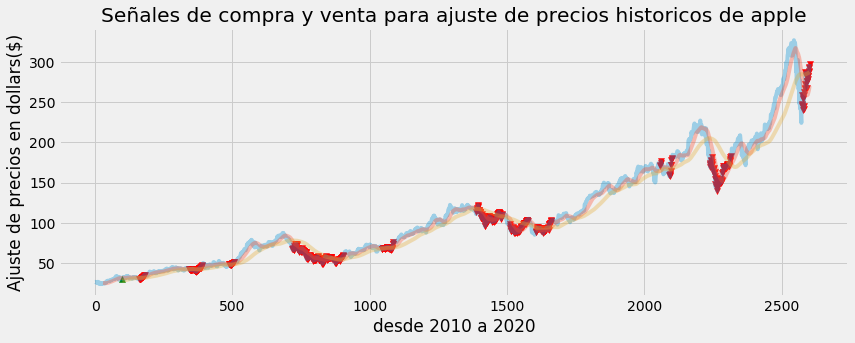

In [39]:
#visualizar los datos y las estrategias para comprar y vender el stock
plt.figure(figsize=(12.6,4.6))
plt.plot(data['Apple'],label ='Apple', alpha= 0.35)
plt.plot(data['SMA30'],label ='SMA30', alpha=0.35)
plt.plot(data['SMA100'],label ='SMA100', alpha=0.35)
plt.scatter(data.index, data['Buy_signal_Price'], label='Buy', marker= '^', color='green')
plt.scatter(data.index, data['Sell_signal_Price'], label='Sell', marker= 'v', color='red')
plt.title('Señales de compra y venta para ajuste de precios historicos de apple')
plt.xlabel('desde 2010 a 2020')
plt.ylabel('Ajuste de precios en dollars($)')
plt.show()